In [1]:
import geopandas as gpd
from concurrent.futures import ProcessPoolExecutor
import requests
import shutil
from pathlib import Path

/home/sandeep/miniconda3/envs/geoai/lib/python3.11/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_2907072/3794359860.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are us

In [2]:
df = gpd.read_file('/home/sandeep/workspace/data/admin/WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp')

<Axes: >

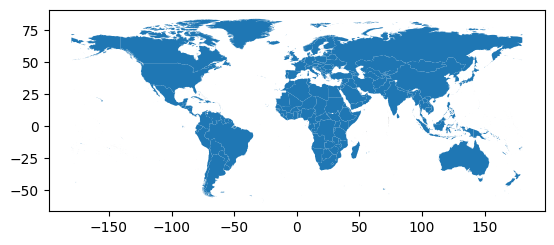

In [3]:
df.plot()

In [4]:
df_flt = df[df['NAME_EN'] == 'India']

In [5]:
bf_tiles = gpd.read_file('https://sites.research.google/open-buildings/tiles.geojson')

<Axes: >

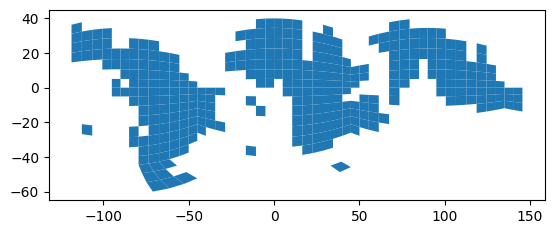

In [6]:
bf_tiles.plot()

In [7]:
output_folder = Path('/home/sandeep/workspace/data/google-building-footprints/v3')
def download_file(url, output_folder=output_folder):
    filepath = output_folder / url.split('/')[-1]
    filepath_temp = filepath.with_suffix('.tmp')
    if not filepath.exists():
        with requests.get(url, stream=True) as r:
            with open(filepath_temp, 'wb') as f:
                shutil.copyfileobj(r.raw, f)
        shutil.move(filepath_temp, filepath)
    return filepath

In [8]:
urls = bf_tiles[bf_tiles.intersects(df_flt.unary_union)]['tile_url'].values


pool = ProcessPoolExecutor(max_workers=10)
res = pool.map(download_file, urls)
for i, path in enumerate(res):
    print(f"Progress: {i}/{len(urls)} | Downloaded: {path}")
pool.shutdown()

Progress: 0/23 | Downloaded: /home/sandeep/workspace/data/google-building-footprints/v3/307_buildings.csv.gz
Progress: 1/23 | Downloaded: /home/sandeep/workspace/data/google-building-footprints/v3/309_buildings.csv.gz
Progress: 2/23 | Downloaded: /home/sandeep/workspace/data/google-building-footprints/v3/30b_buildings.csv.gz
Progress: 3/23 | Downloaded: /home/sandeep/workspace/data/google-building-footprints/v3/373_buildings.csv.gz
Progress: 4/23 | Downloaded: /home/sandeep/workspace/data/google-building-footprints/v3/375_buildings.csv.gz
Progress: 5/23 | Downloaded: /home/sandeep/workspace/data/google-building-footprints/v3/38f_buildings.csv.gz


Progress: 6/23 | Downloaded: /home/sandeep/workspace/data/google-building-footprints/v3/391_buildings.csv.gz
Progress: 7/23 | Downloaded: /home/sandeep/workspace/data/google-building-footprints/v3/393_buildings.csv.gz
Progress: 8/23 | Downloaded: /home/sandeep/workspace/data/google-building-footprints/v3/395_buildings.csv.gz
Progress: 9/23 | Downloaded: /home/sandeep/workspace/data/google-building-footprints/v3/397_buildings.csv.gz
Progress: 10/23 | Downloaded: /home/sandeep/workspace/data/google-building-footprints/v3/399_buildings.csv.gz
Progress: 11/23 | Downloaded: /home/sandeep/workspace/data/google-building-footprints/v3/39b_buildings.csv.gz
Progress: 12/23 | Downloaded: /home/sandeep/workspace/data/google-building-footprints/v3/39f_buildings.csv.gz
Progress: 13/23 | Downloaded: /home/sandeep/workspace/data/google-building-footprints/v3/3a1_buildings.csv.gz
Progress: 14/23 | Downloaded: /home/sandeep/workspace/data/google-building-footprints/v3/3a3_buildings.csv.gz
Progress: 15/2

AttributeError: 'ProcessPoolExecutor' object has no attribute 'close'